In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
baseline = pd.read_csv('../../data/baseline_features.csv')
news = pd.read_csv('../../data/news_features.csv')

# separate columns by numeric type
baseline_numcol = baseline.select_dtypes(include=np.number).columns.tolist()
news_numcol = news.select_dtypes(include=np.number).columns.tolist()

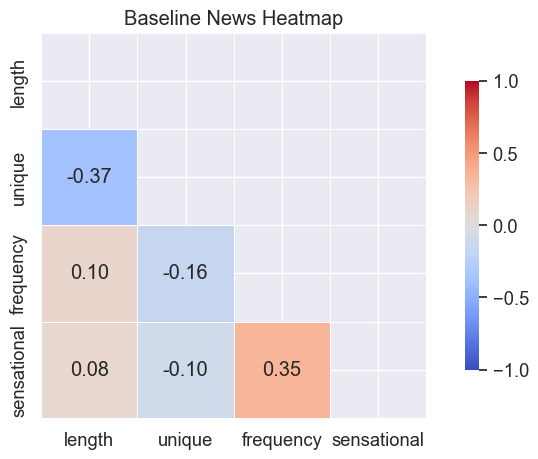

In [3]:
# plotting relationship b/w variables via heatmap
correl_matrix = baseline[baseline_numcol].corr()
mask = np.triu(correl_matrix)

plt.figure(figsize=(10,5))
sns.set(font_scale=1.2) 
sns.heatmap(correl_matrix,cmap="coolwarm",annot=True,fmt=".2f", vmin=-1, vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": 0.75},mask=mask)
plt.savefig("baseline_heatmap.png")
plt.title('Baseline News Heatmap')
plt.show()

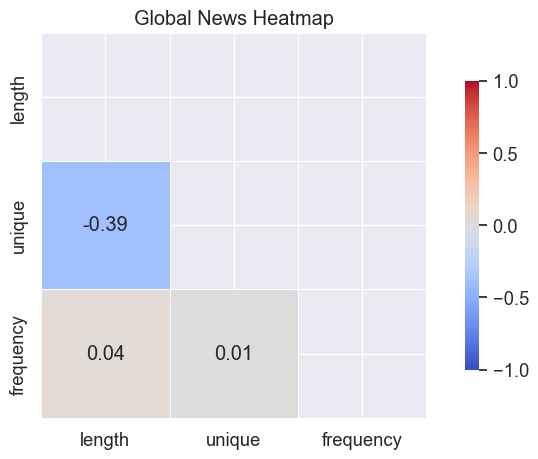

In [4]:
correl_matrix = news[news_numcol].corr()
mask = np.triu(correl_matrix)

plt.figure(figsize=(10,5))
sns.set(font_scale=1.2) 
sns.heatmap(correl_matrix,cmap="coolwarm",annot=True,fmt=".2f", vmin=-1, vmax=1,square=True,linewidths=.5,cbar_kws={"shrink": 0.75},mask=mask)
plt.savefig("news_heatmap.png")
plt.title('Global News Heatmap')
plt.show()

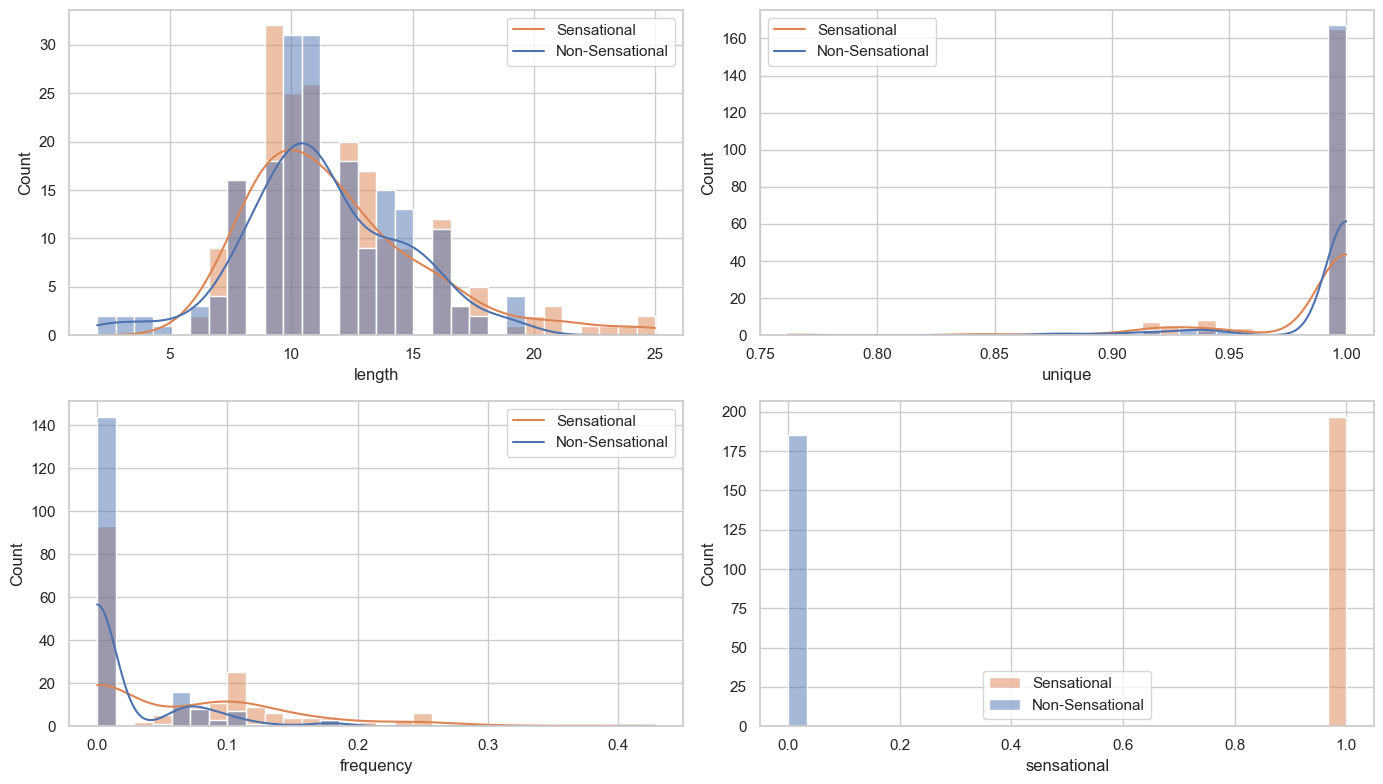

In [6]:
# plotting histogram
predictor_col = baseline[baseline_numcol]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
sns.set(style="whitegrid") 
color = sns.color_palette("Set2")[0]
axes = axes.flatten()

for i, col in enumerate(predictor_col):
    sns.histplot(baseline, x=col, bins=30, kde=True, color=color, hue='sensational', ax=axes[i],legend=False)
    axes[i].legend(labels=['Sensational', 'Non-Sensational'])
    
plt.tight_layout()
plt.savefig("baseline_histplots.png")
plt.show()

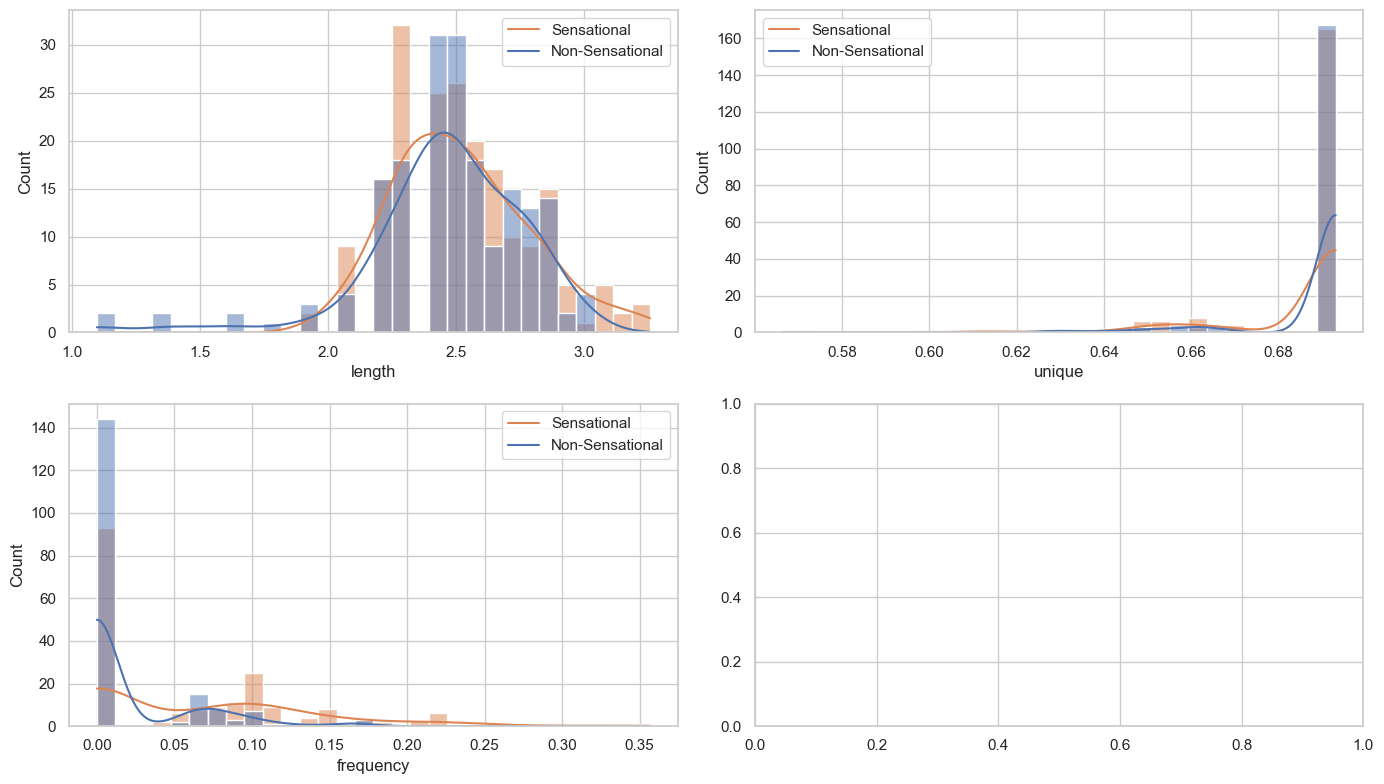

In [13]:
# plotting histogram
predictor_col = news[news_numcol]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
sns.set(style="whitegrid") 
color = sns.color_palette("Set2")[0]
axes = axes.flatten()

for i, col in enumerate(predictor_col):
    sns.histplot(baseline, x=col, bins=30, kde=True, color=color, hue='sensational', ax=axes[i],legend=False)
    axes[i].legend(labels=['Sensational', 'Non-Sensational'])
    
plt.tight_layout()
plt.savefig("news_histplots.png")
plt.show()

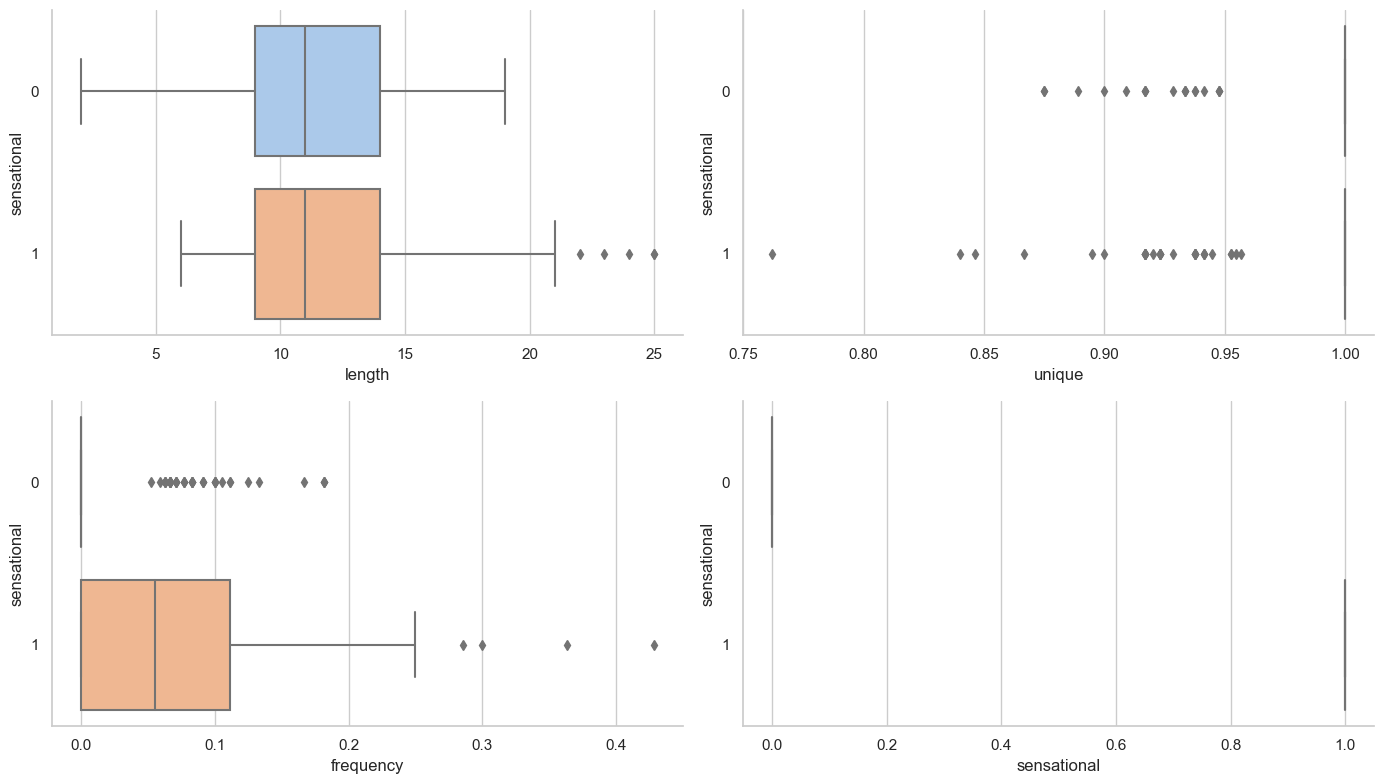

In [7]:
# plotting box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")
axes = axes.flatten()

for i, col in enumerate(baseline[baseline_numcol]):
    sns.boxplot(baseline, palette=palette,x=col, y='sensational', ax=axes[i], orient='h')
    sns.despine()

plt.tight_layout()
plt.savefig("baseline_boxplot.png")
plt.show()

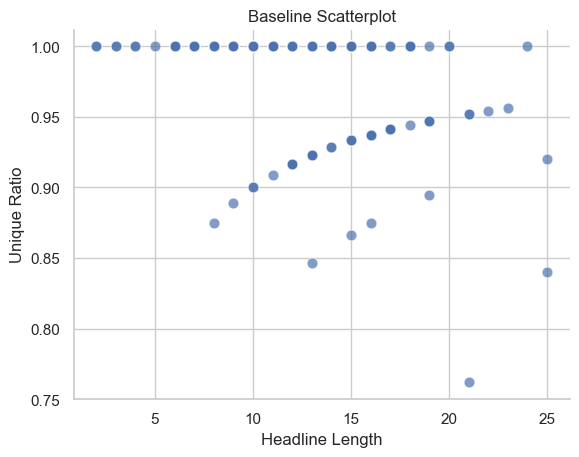

In [8]:
# plotting scatterplot
sns.set(style="whitegrid")
palette = sns.color_palette("deep")

sns.scatterplot(x=baseline['length'], y=baseline['unique'],color=palette[0], marker='o', s=60, alpha=0.7)

plt.title('Baseline Scatterplot')
plt.xlabel('Headline Length')
plt.ylabel('Unique Ratio')

sns.despine()
plt.savefig("length_vs_unique.png")
plt.show()

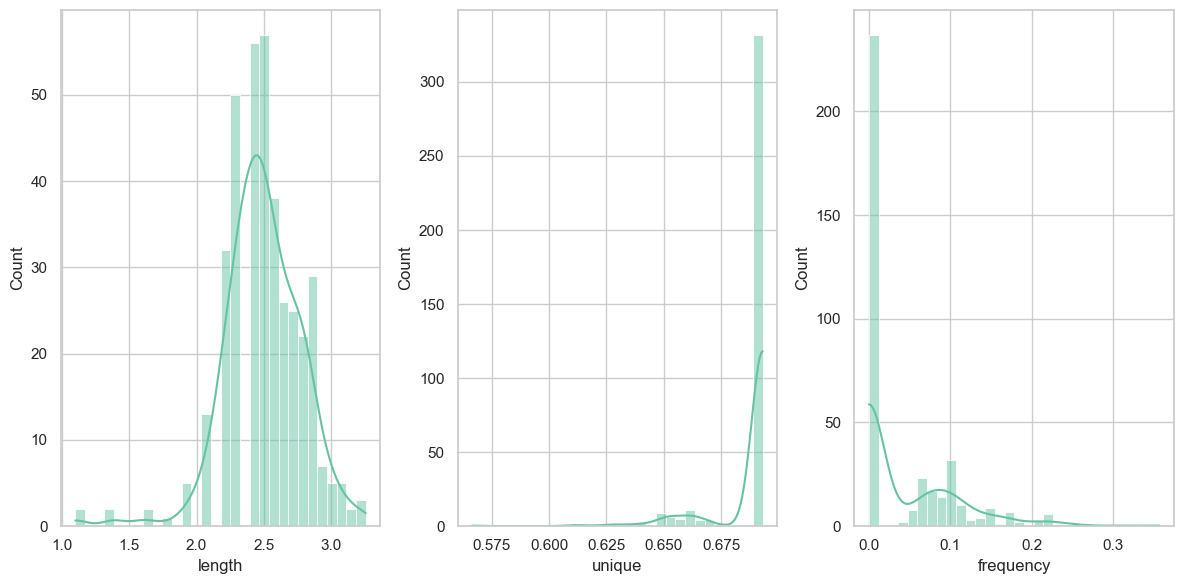

In [9]:
# apply log transformations on skewed distributions from analysis
skewed_col = ['length','unique','frequency']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
sns.set(style="whitegrid") 
color = sns.color_palette("Set2")[0]
axes = axes.flatten()

for i, col in enumerate(skewed_col):
    baseline[col] = baseline[col].apply(np.log1p)
    sns.histplot(baseline, x=col, bins=30, kde=True, color=color, ax=axes[i],legend=False)

plt.tight_layout()
plt.savefig("baseline_transform.png")
plt.show()

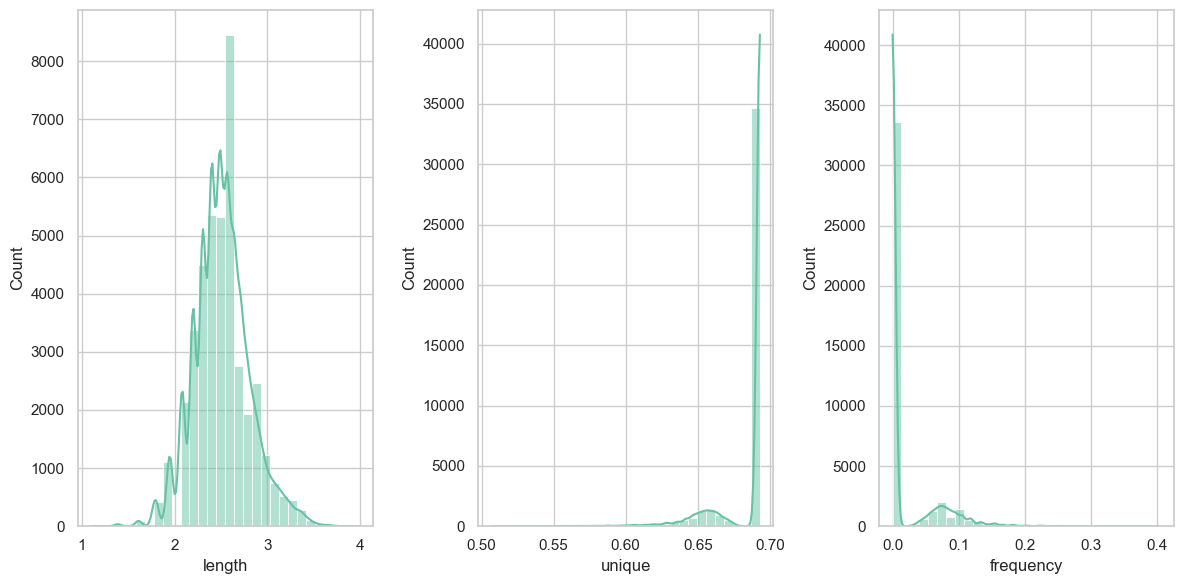

In [11]:
skewed_col = ['length','unique','frequency']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
sns.set(style="whitegrid") 
color = sns.color_palette("Set2")[0]
axes = axes.flatten()

for i, col in enumerate(skewed_col):
    news[col] = news[col].apply(np.log1p)
    sns.histplot(news, x=col, bins=30, kde=True, color=color, ax=axes[i],legend=False)

plt.tight_layout()
plt.savefig("news_transform.png")
plt.show()

In [10]:
# save dataframes as csv
baseline.to_csv('baseline_features.csv',index=False)
news.to_csv('news_features.csv',index=False)